# Investment Planning for Electricity Generation

*Daniel Cortild, Anastasia Bouwsma, Esteban Castillo Mondragón*

## Part 1

In [4]:
from scipy.optimize import linprog
import numpy as np
import pandas as pd
import cvxpy as cp
import time
import gurobipy
import tqdm

print(cp.installed_solvers())
def print_solution(problem,x):
    print(f"Objective value: {problem.value}")
    print(f"Capacity of each technology: {x.value[0:n]}")
    precost=sum([c[i]*x.value[i] for i in range(n)])
    prodcost=sum([c[i]*x.value[i] for i in np.arange(n,len(x.value))])
    print(f"Investment costs for phase 1: {precost}")
    print(f"Production costs for phase 2: {prodcost}")
n=4
k=3    

['CLARABEL', 'ECOS', 'ECOS_BB', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']


### Expected Value Problem

In [2]:

c = [10.,7.,16.,6.]  #costs for instalation
c=c 
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*n+[0]*(len(c)-n)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:n]+[0]*(len(c)-n)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(k-i)+(([0]*i+[1]+[0]*(k-i))*k) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(n+n*i)+[-1]*n+[0]*(len(c)-8-n*i) for i in range(k)]
bub = bub + [-5,-3,-2]

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res= problem.solve(solver = cp.GUROBI)
avres=list(x.value[0:n])
precost=sum([c[i]*x.value[i] for i in range(n)])
prodcost=sum([c[i]*x.value[i] for i in np.arange(n,len(x.value))])
print_solution(problem,x)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Objective value: 394.6666666666667
Capacity of each technology: [2.83333333 3.         2.16666667 6.        ]
Investment costs for phase 1: 120.0
Production costs for phase 2: 274.6666666666667


### Expected Value Solution

In [3]:
#function to test the average sollution in practice
#c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= [v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
#Aub = [[-1]*4+[0]*(len(c)-4)]
#bub=[-7-4-3]
#budget
#Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
#bub.append(120)

#phase 2 constraints
#capacity
Aub =[[0]*(12*j)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-12-12*j ) for j in range(len(probs)) for i in range(n) ]
bub =  avres*len(probs)

#power requirement
Aub = Aub + [[0]*(4*i+12*j)+[-1]*4+[0]*(len(c)-4-4*i-12*j) for j in range(len(probs)) for i in range(k)]

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res3= problem.solve(solver = cp.GUROBI)
print(res3+precost)

399.5926666666666


### Regular Problem

In [6]:
c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= c+[v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*(i )+[-1]+[0]*(3-i+12*k)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-16-12*k ) for k in range(len(probs)) for i in range(4) ]
bub = bub+ [0]*4*len(probs)

#power requirement
Aub = Aub + [[0]*(4+4*i+12*k)+[-1]*4+[0]*(len(c)-8-4*i-12*k) for k in range(len(probs)) for i in range(3)]

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 


x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res2= problem.solve(solver = cp.GUROBI)
print_solution(problem,x)

Objective value: 397.75133333333326
Capacity of each technology: [3.16666667 5.         1.83333333 4.        ]
Investment costs for phase 1: 120.0
Production costs for phase 2: 277.7513333333333


### Perfect Information

In [7]:
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
c = [10.,7.,16.,6.]  #costs for instalation
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(3-i)+(([0]*i+[1]+[0]*(3-i))*3) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(4+4*i)+[-1]*4+[0]*(len(c)-8-4*i) for i in range(k)]

costs = []
for a in range(len(demands)):
    #costs = costs+[linprog(c=c, A_ub = Aub, b_ub = bub+(demands[a])).fun*probs[a]]
    #print(sum(costs))  
    x=cp.Variable(len(c))
    Aub = np.array(Aub)
    c= np.array(c)
    b_ub_temp = np.array(bub+demands[a])
    restricts=[Aub @ x <= b_ub_temp]+ [x >= 0]
    problem = cp.Problem(cp.Minimize(c.T @x),restricts )

    costs=costs+[problem.solve(solver = cp.GUROBI)*probs[a]]
print(f"Total costs: {sum(costs)}")

Total costs: 394.9666666666667


## Part 2

In [19]:
def print_solution(problem,x):
    print(f"Objective value: {problem.value}")
    print(f"Capacity of each technology: {x.value[0:n]}")
    print(f"Maximum capacity: {x.value[0:n]@[0.9,0.8,0.8,1.]}")
    precost=sum([cset[i]*x.value[i] for i in range(n)])
    prodcost=sum([cset[i]*x.value[i] for i in np.arange(n,len(x.value))])
    print(f"Investment costs for phase 1: {precost}")
    print(f"Production costs for phase 2: {prodcost}")

In [20]:
nreal = 10
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
print_solution(problem,x)

print(f'Time taken in seconds {t2-t1}')

[0, 1, 2, 3]
4054
-var329770[4049 4050 4051 4052 4053] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var329770[3] @ 0.9551521649973017 + -var329770[4042 4047 4052] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Set parameter TimeLimit to value 100
Objective value: 410.9004117968024
Capacity of each technology: [4.80683132 6.36612504 0.         1.4319222 ]
Maximum capacity: 10.850970421639207
Investment costs for phase 1: 101.22272170883265
Production costs for phase 2: 309.6776900879698
Time taken in seconds 2.440762519836426


In [27]:
nreal = 35
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
print_solution(problem,x)

print(f'Time taken in seconds {t2-t1}')

[0, 1, 2, 3]
14179
-var519674[14174 14175 14176 14177 14178] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var519674[3] @ param519673[139] + -var519674[14167 14172 14177] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Set parameter TimeLimit to value 100
Objective value: 411.9907071207328
Capacity of each technology: [4.88541292 6.34383758 0.         1.54196578]
Maximum capacity: 11.01390747000548
Investment costs for phase 1: 102.51278693323944
Production costs for phase 2: 309.47792018749504
Time taken in seconds 196.0101752281189


In [28]:
rndvl= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
print_solution(problem,x)

Objective value: 409.23142976457655
Capacity of each technology: [6.16550724 4.77733604 0.         1.64700082]
Maximum capacity: 11.017826172585295
Investment costs for phase 1: 104.97842964858714
Production costs for phase 2: 304.25300011599177


In [29]:
params =[]
values = []
for o in tqdm(range(150)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


[np.float64(411.2137508131917), np.float64(412.4562512162623), np.float64(413.480222264791), np.float64(410.8816931798496), np.float64(412.2232459910331), np.float64(409.54706809978313), np.float64(411.92121726997317), np.float64(411.38146965612304), np.float64(410.3426642052176), np.float64(412.5825824109903), np.float64(411.1160425542863), np.float64(411.086470638547), np.float64(411.2645289824784), np.float64(408.838724733659), np.float64(411.8563807408203), np.float64(412.12884923406875), np.float64(409.0987883676052), np.float64(410.21574423891525), np.float64(411.97796928875687), np.float64(410.5764759314317), np.float64(410.1508529424455), np.float64(410.9692670057818), np.float64(410.13464290502895), np.float64(410.8153045336933), np.float64(411.66104393528343), np.float64(410.4373379516697), np.float64(411.3604479761832), np.float64(411.59148048684244), np.float64(407.15652620335834), np.float64(409.74268430624704), np.float64(408.5943383251255), np.float64(411.76712958771645)

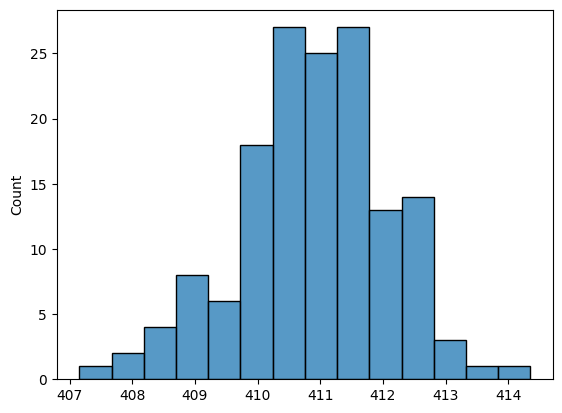

In [30]:
import seaborn
import pandas
print(values)
print(params)
seaborn.histplot(values)
paramar = pandas.DataFrame(params,columns=["one","two","three","four"] )
print(max(paramar["three"]))

In [35]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/cases for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = costsvec*cases

rqual= np.random.uniform(size=cases*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
rqual = cp.Parameter(shape=cases*4 ,value=[rqual[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)])

#randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)]
x=cp.Variable(len(cset) )
capacities= cp.Parameter(shape=4, value=[10]*4)

#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5]@multidin2<= demands[(k//3)%27][k%3] for k in range(cases*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([0,5,10]) 
multiding = np.array([1,1,1])
constr = constr + [capacities[k]*rqual[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*cases) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
print_solution(lilproblem,x)

print(f'Time taken in seconds {t2-t1}')

[0, 1, 2, 3]
405
-var674323[400 401 402 403 404] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= param674324[3] @ param674322[3] + -var674323[393 398 403] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-03
Set parameter TimeLimit to value 100
Objective value: 229.43852939643526
Capacity of each technology: [0. 0. 3. 0.]
Maximum capacity: 2.4000000000000004
Investment costs for phase 1: 2.592
Production costs for phase 2: 226.8465293964352
Time taken in seconds 0.1533069610595703


/home/esteban/rug/optimization_under_uncertainty/assignment/venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:237: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


In [ ]:
ntests=50
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
valuevector = []
for Val in tqdm(range(len(params))):
    capacities.value = params[Val]
    curval =params[Val]@[10.,7.,16.,6.]
    for t in rndvl:
        rqual.value = t
        lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
        curval = curval +lilproblem.value/ntests
    valuevector = valuevector +[curval]

[[np.float64(0.75813147508991), np.float64(0.7906020577741096), np.float64(0.6366482010421265), np.float64(0.9308948500529033)], [np.float64(0.8909385604563372), np.float64(0.7834376357568669), np.float64(0.7959227007011285), np.float64(0.9317730076176893)], [np.float64(0.7553112626524967), np.float64(0.7232845643719937), np.float64(0.7662281451718072), np.float64(0.9668776368980694)], [np.float64(0.7830640085789368), np.float64(0.7607510541266868), np.float64(0.5290019744879997), np.float64(0.958710795456353)], [np.float64(0.8461499978095689), np.float64(0.7848097915723034), np.float64(0.6962961124272418), np.float64(0.9675697516333507)], [np.float64(0.6249459238977003), np.float64(0.7477951811510355), np.float64(0.7065309567610789), np.float64(0.9456431638842218)], [np.float64(0.7311354764229427), np.float64(0.7792214667432936), np.float64(0.6277207366430781), np.float64(0.9640227732134892)], [np.float64(0.7734988901692523), np.float64(0.7398013291900846), np.float64(0.77806087911930

In [ ]:
seaborn.histplot(valuevector)

print(params[ valuevector.index(min(valuevector))])
optipars = params[ valuevector.index(min(valuevector))]
print(min(valuevector))
print(sum( [params[ valuevector.index(min(valuevector))][k]*[10.,7.,16.,6.][k] for k in range(4)]))

In [ ]:
paramar.to_csv("BackupStorage-paramtests")
pandas.DataFrame(valuevector).to_csv("BackupStorage-results")
pandas.DataFrame(values).to_csv("BackupStorage-initialoutcomes")



In [ ]:
import pandas
paramar = pandas.read_csv("BackupStorage-paramtests")
paramar = paramar[["one", "two", "three", "four"]]
params = paramar.values.tolist()
valuevector = pandas.read_csv("BackupStorage-results")
valuevector = valuevector["0"].to_list()
values  =pandas.read_csv("BackupStorage-initialoutcomes")
values = values["0"].to_list()
t=[0,0,2]

### Expected Value Problem

In [ ]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= [0.5]*4
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
print_solution(problem,x)

print(f'Time taken in seconds {t2-t1}')

avph11= x.value[0:4]

In [ ]:
ntests=1000
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
Vtestvec = []
#curval =sum([optipars[i]*[10.,7.,16.,6.][i] for i in range(4)]) 
curval =avph11@[10.,7.,16.,6.]
print(curval)
q = 0
for t in rndvl:
    print(q)
    rqual.value = t
    lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
    Vtestvec =Vtestvec+[curval +lilproblem.value] 
    q=q+1
print(np.mean(Vtestvec))
print(np.sqrt(np.var(Vtestvec)))

In [ ]:
import scipy
import scipy.spatial
Tree = scipy.spatial.KDTree(params)
print(Tree.query(avph11))
print(params[Tree.query(avph11)[1]] )
print(valuevector[Tree.query(avph11)[1]])
min(valuevector)
print(avph11)
for k in paramar.columns:
    print(k)
    print(np.mean(paramar[k]))
    print(np.var(paramar[k]))

### Perfect Information

In [ ]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
print_solution(problem,x)

print(f'Time taken in seconds {t2-t1}')

In [ ]:
params =[]
values = []
for o in tqdm(range(4000)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

In [ ]:
np.mean(values)

In [ ]:
seaborn.histplot(values)